# Microsoft Video Studio Data Analysis
---------

### Business Problem

Microsoft recognizes the trend of major companies producing their own original video content and wants to join in. However, as they lack experience in movie creation, they have established a new movie studio. Your task is to investigate the current performance of different film genres at the box office and translate the results into practical recommendations for the head of Microsoft's movie studio to guide their decision making on the types of films to produce.


### Analysis Objectives

1. Research current film trends and analyze box office success of various movie genres.
2. Identify the most profitable and popular movie genres in the market.
3. Develop a list of recommendations for Microsoft's new movie studio based on the research findings.
4. Present a comprehensive report of the research findings and recommendations to the head of the new movie studio.

In [742]:
# Importing the Libraries required for the Analysis
import pandas as pd
import numpy as np
import seaborn as sns;sns.set_theme(style='darkgrid')
import matplotlib.pyplot as plt
# Filtering out warnings
import warnings
warnings.filterwarnings('ignore')

In [695]:
#Loading the title basics data
title_basics = pd.read_csv('imdb.title.basics.csv.gz')
title_basics.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00000,"Comedy,Drama,Fantasy"


In [696]:
# Loading the title ratings dataset
title_headings = pd.read_csv('imdb.title.ratings.csv.gz')
title_headings.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.30000,31
1,tt10384606,8.90000,559
2,tt1042974,6.40000,20
3,tt1043726,4.20000,50352
4,tt1060240,6.50000,21


In [697]:
# Loading the bom.gross dataset
bom_movie = pd.read_csv('bom.movie_gross.csv.gz')
bom_movie.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00000,664300000,2010
3,Inception,WB,292600000.00000,535700000,2010
4,Shrek Forever After,P/DW,238700000.00000,513900000,2010


In [698]:
# Loading the movie budgets dataset
movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [699]:
tmdb = pd.read_csv('tmdb.movies.csv.gz',index_col=0)
tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53300,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70000,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73400,2010-03-26,How to Train Your Dragon,7.70000,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.51500,2010-05-07,Iron Man 2,6.80000,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00500,1995-11-22,Toy Story,7.90000,10174
4,"[28, 878, 12]",27205,en,Inception,27.92000,2010-07-16,Inception,8.30000,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.60000,2018-10-13,Laboratory Conditions,0.00000,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60000,2018-05-01,_EXHIBIT_84xxx_,0.00000,1
26514,"[14, 28, 12]",381231,en,The Last One,0.60000,2018-10-01,The Last One,0.00000,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60000,2018-06-22,Trailer Made,0.00000,1


In [700]:
# Investigating the shape of the datasets

### Data Preprocessing 

In [701]:
# Before taking any preprocessing steps first investigate the attributes of the datasets
print('The title basics dataset has ' + str(title_basics.shape[0]) + ' rows and ' + str(title_basics.shape[1]) + ' columns.')
print('The title headings dataset has ' + str(title_headings.shape[0]) + ' rows and ' + str(title_headings.shape[1]) + ' columns.')
print('The bom movie dataset has ' + str(bom_movie.shape[0]) + ' rows and ' + str(bom_movie.shape[1]) + ' columns.')
print('The movie budgets dataset has ' + str(movie_budgets.shape[0]) + ' rows and ' + str(movie_budgets.shape[1]) + ' columns.')
print('The tmdb dataset has ' + str(tmdb.shape[0]) + ' rows and ' + str(tmdb.shape[1]) + ' columns.')

The title basics dataset has 146144 rows and 6 columns.
The title headings dataset has 73856 rows and 3 columns.
The bom movie dataset has 3387 rows and 5 columns.
The movie budgets dataset has 5782 rows and 6 columns.
The tmdb dataset has 26517 rows and 9 columns.


In [702]:
# Before taking any preprocessing steps first investigate the attributes of the datasets

datasets = [title_basics,title_headings,bom_movie,movie_budgets,tmdb]
names = ['title_basics','title_headings','bom_movie','movie_budgets','tmdb']

for dataset,name in zip(datasets,names):
  print('The ' + str(name) + ' dataset has ' + str(dataset.shape[0]) + ' rows and ' + str(dataset.shape[1]) + ' columns.')

The title_basics dataset has 146144 rows and 6 columns.
The title_headings dataset has 73856 rows and 3 columns.
The bom_movie dataset has 3387 rows and 5 columns.
The movie_budgets dataset has 5782 rows and 6 columns.
The tmdb dataset has 26517 rows and 9 columns.


In [703]:
# Investigating the null values in the datasets
for dataset,name in zip(datasets,names):
  print('The ' + str(name) + ' dataset has the following null values') 
  print(str(dataset.isna().sum()))
  print('-----------------------------------------------------------------')

The title_basics dataset has the following null values
tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
-----------------------------------------------------------------
The title_headings dataset has the following null values
tconst           0
averagerating    0
numvotes         0
dtype: int64
-----------------------------------------------------------------
The bom_movie dataset has the following null values
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
-----------------------------------------------------------------
The movie_budgets dataset has the following null values
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64
-----------------------------------------------------------------
The 

- The title headings and movie dataset had no null values, the other datasets all had missing values in one or more columns.

#### Merging the Datasets.

- In order to clean then analyze the data, merging the datasets was a required step.

In [704]:
# movie_budgets
df = movie_budgets.merge(tmdb,left_on='movie',right_on='original_title',suffixes=('_movie_budgets', '_tmdb')).merge(title_basics,left_on='movie',right_on='primary_title',suffixes=('_movie_budgets', '_title_basics'))
df

,id_movie_budgets,release_date_movie_budgets,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,id_tmdb,original_language,original_title_movie_budgets,...,release_date_tmdb,title,vote_average,vote_count,tconst,primary_title,original_title_title_basics,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","[28, 12, 14, 878]",19995,en,Avatar,...,2009-12-18,Avatar,7.40000,18676,tt1775309,Avatar,Abatâ,2011,93.00000,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,...,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.40000,8571,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.00000,"Action,Adventure,Fantasy"
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","[28, 12, 878]",99861,en,Avengers: Age of Ultron,...,2015-05-01,Avengers: Age of Ultron,7.30000,13457,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00000,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200","[12, 28, 14]",299536,en,Avengers: Infinity War,...,2018-04-27,Avengers: Infinity War,8.30000,13948,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.00000,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209","[28, 12, 14, 878]",141052,en,Justice League,...,2017-11-17,Justice League,6.20000,7510,tt0974015,Justice League,Justice League,2017,120.00000,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,51,"Apr 21, 2015",Ten,"$25,000",$0,$0,"[12, 27, 9648, 53]",279516,en,Ten,...,2014-03-28,Ten,5.40000,5,tt2496400,Ten,Ten,2014,83.00000,"Adventure,Horror,Mystery"
4198,51,"Apr 21, 2015",Ten,"$25,000",$0,$0,"[12, 27, 9648, 53]",279516,en,Ten,...,2014-03-28,Ten,5.40000,5,tt6415838,Ten,Ten,2017,82.00000,"Horror,Mystery,Thriller"
4199,54,"Dec 31, 2014",Dry Spell,"$22,000",$0,$0,"[35, 10749]",255266,en,Dry Spell,...,2013-02-14,Dry Spell,6.00000,1,tt2375036,Dry Spell,Dry Spell,2013,90.00000,"Comedy,Romance"
4200,56,"Jan 4, 2013",All Superheroes Must Die,"$20,000",$0,$0,"[878, 53]",86304,en,All Superheroes Must Die,...,2013-01-04,All Superheroes Must Die,3.90000,19,tt1836212,All Superheroes Must Die,All Superheroes Must Die,2011,78.00000,"Sci-Fi,Thriller"


In [705]:
df.columns

Index(['id_movie_budgets', 'release_date_movie_budgets', 'movie',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'genre_ids',
       'id_tmdb', 'original_language', 'original_title_movie_budgets',
       'popularity', 'release_date_tmdb', 'title', 'vote_average',
       'vote_count', 'tconst', 'primary_title', 'original_title_title_basics',
       'start_year', 'runtime_minutes', 'genres'],
      dtype='object')

##### Data Cleaning 

In [706]:
## First step to be taken is to drop redundant columns
df.drop(['id_movie_budgets','release_date_movie_budgets','genre_ids','id_tmdb','original_language',
         'original_title_movie_budgets','title','original_title_title_basics','start_year','tconst','primary_title'
        ],axis=1,inplace=True)

In [707]:
df.shape

(4202, 10)

In [708]:
df

,movie,production_budget,domestic_gross,worldwide_gross,popularity,release_date_tmdb,vote_average,vote_count,runtime_minutes,genres
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",26.52600,2009-12-18,7.40000,18676,93.00000,Horror
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",30.57900,2011-05-20,6.40000,8571,136.00000,"Action,Adventure,Fantasy"
2,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",44.38300,2015-05-01,7.30000,13457,141.00000,"Action,Adventure,Sci-Fi"
3,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",80.77300,2018-04-27,8.30000,13948,149.00000,"Action,Adventure,Sci-Fi"
4,Justice League,"$300,000,000","$229,024,295","$655,945,209",34.95300,2017-11-17,6.20000,7510,120.00000,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...
4197,Ten,"$25,000",$0,$0,1.57500,2014-03-28,5.40000,5,83.00000,"Adventure,Horror,Mystery"
4198,Ten,"$25,000",$0,$0,1.57500,2014-03-28,5.40000,5,82.00000,"Horror,Mystery,Thriller"
4199,Dry Spell,"$22,000",$0,$0,0.60000,2013-02-14,6.00000,1,90.00000,"Comedy,Romance"
4200,All Superheroes Must Die,"$20,000",$0,$0,2.07800,2013-01-04,3.90000,19,78.00000,"Sci-Fi,Thriller"


In [709]:
df[['production_budget','domestic_gross','worldwide_gross']]= df[['production_budget','domestic_gross','worldwide_gross']].replace({'\$':'',
                                                                               '\,':''}, regex = True)
df.head()

,movie,production_budget,domestic_gross,worldwide_gross,popularity,release_date_tmdb,vote_average,vote_count,runtime_minutes,genres
0,Avatar,425000000,760507625,2776345279,26.52600,2009-12-18,7.40000,18676,93.00000,Horror
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,30.57900,2011-05-20,6.40000,8571,136.00000,"Action,Adventure,Fantasy"
2,Avengers: Age of Ultron,330600000,459005868,1403013963,44.38300,2015-05-01,7.30000,13457,141.00000,"Action,Adventure,Sci-Fi"
3,Avengers: Infinity War,300000000,678815482,2048134200,80.77300,2018-04-27,8.30000,13948,149.00000,"Action,Adventure,Sci-Fi"
4,Justice League,300000000,229024295,655945209,34.95300,2017-11-17,6.20000,7510,120.00000,"Action,Adventure,Fantasy"


In [710]:
# Checking for null values in the dataset
df.isna().sum()

movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
popularity             0
release_date_tmdb      0
vote_average           0
vote_count             0
runtime_minutes      411
genres                69
dtype: int64

- Runtime Minutes and Genres both had missing values. The action to be taken to fill in  the *Median* for the runtime and drop null values for the Genres

In [711]:
# Filling in the null
df['runtime_minutes'] = df['runtime_minutes'].fillna(df['runtime_minutes'].median())

In [712]:
#Dropping the null entries in the Genres column
df.genres.dropna(inplace=True)

In [713]:
# Checking for duplicated entries in the dataset
df.duplicated().sum()

308

In [714]:
# Investigating further due to the presence of duplicated values
df[df.duplicated(keep=False)]

,movie,production_budget,domestic_gross,worldwide_gross,popularity,release_date_tmdb,vote_average,vote_count,runtime_minutes,genres
4,Justice League,300000000,229024295,655945209,34.95300,2017-11-17,6.20000,7510,120.00000,"Action,Adventure,Fantasy"
5,Justice League,300000000,229024295,655945209,34.95300,2017-11-17,6.20000,7510,120.00000,"Action,Adventure,Fantasy"
6,Spectre,300000000,200074175,879620923,30.31800,2015-11-06,6.40000,6719,148.00000,"Action,Adventure,Thriller"
7,Spectre,300000000,200074175,879620923,30.31800,2015-11-06,6.40000,6719,148.00000,"Action,Adventure,Thriller"
52,Rogue One: A Star Wars Story,200000000,532177324,1049102856,21.40100,2016-12-16,7.50000,9296,133.00000,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...
4135,Top Spin,150000,5858,5858,1.24900,2014-11-15,6.90000,10,80.00000,Documentary
4179,The Image Revolution,50000,0,0,1.31300,2013-11-21,6.30000,4,81.00000,"Biography,Documentary"
4180,The Image Revolution,50000,0,0,1.31300,2013-11-21,6.30000,4,81.00000,"Biography,Documentary"
4188,Krisha,30000,144822,144822,5.28800,2016-03-18,6.80000,86,83.00000,Drama


In [715]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

In [716]:
# Checking once again for any duplicated entries in the data
df[df.duplicated(keep=False)]

,movie,production_budget,domestic_gross,worldwide_gross,popularity,release_date_tmdb,vote_average,vote_count,runtime_minutes,genres


In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3894 entries, 0 to 4201
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              3894 non-null   object 
 1   production_budget  3894 non-null   object 
 2   domestic_gross     3894 non-null   object 
 3   worldwide_gross    3894 non-null   object 
 4   popularity         3894 non-null   float64
 5   release_date_tmdb  3894 non-null   object 
 6   vote_average       3894 non-null   float64
 7   vote_count         3894 non-null   int64  
 8   runtime_minutes    3894 non-null   float64
 9   genres             3835 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 334.6+ KB


In [718]:
df[['production_budget','domestic_gross','worldwide_gross']] = df[['production_budget','domestic_gross','worldwide_gross']].astype(int)

In [719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3894 entries, 0 to 4201
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              3894 non-null   object 
 1   production_budget  3894 non-null   int64  
 2   domestic_gross     3894 non-null   int64  
 3   worldwide_gross    3894 non-null   int64  
 4   popularity         3894 non-null   float64
 5   release_date_tmdb  3894 non-null   object 
 6   vote_average       3894 non-null   float64
 7   vote_count         3894 non-null   int64  
 8   runtime_minutes    3894 non-null   float64
 9   genres             3835 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 334.6+ KB


### 2. Data Analysis

#### 2.1. Univariate Data Analysis

In [720]:
df.head()

,movie,production_budget,domestic_gross,worldwide_gross,popularity,release_date_tmdb,vote_average,vote_count,runtime_minutes,genres
0,Avatar,425000000,760507625,2776345279,26.52600,2009-12-18,7.40000,18676,93.00000,Horror
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,30.57900,2011-05-20,6.40000,8571,136.00000,"Action,Adventure,Fantasy"
2,Avengers: Age of Ultron,330600000,459005868,1403013963,44.38300,2015-05-01,7.30000,13457,141.00000,"Action,Adventure,Sci-Fi"
3,Avengers: Infinity War,300000000,678815482,2048134200,80.77300,2018-04-27,8.30000,13948,149.00000,"Action,Adventure,Sci-Fi"
4,Justice League,300000000,229024295,655945209,34.95300,2017-11-17,6.20000,7510,120.00000,"Action,Adventure,Fantasy"


In [721]:
df.columns

Index(['movie', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'popularity', 'release_date_tmdb', 'vote_average', 'vote_count',
       'runtime_minutes', 'genres'],
      dtype='object')

# THIS IS A WRONG WAY OF PLOTTING BOXPLOTS. DO NOT DO THIS!!!!!

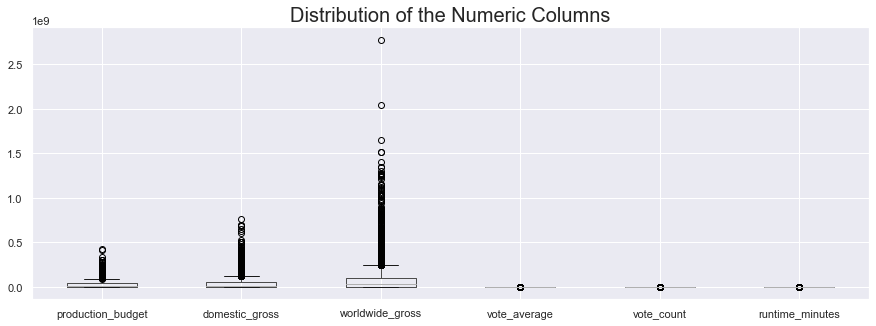

In [722]:
# THIS IS A WRONG WAY OF PLOTTING BOXPLOTS. DO NOT DO THIS!!!!!
plt.figure(figsize=(15,5))
plt.title('Distribution of the Numeric Columns',fontsize=(20))
df1 = df[['production_budget', 'domestic_gross', 'worldwide_gross','vote_average', 'vote_count',
       'runtime_minutes']]
df1.boxplot();

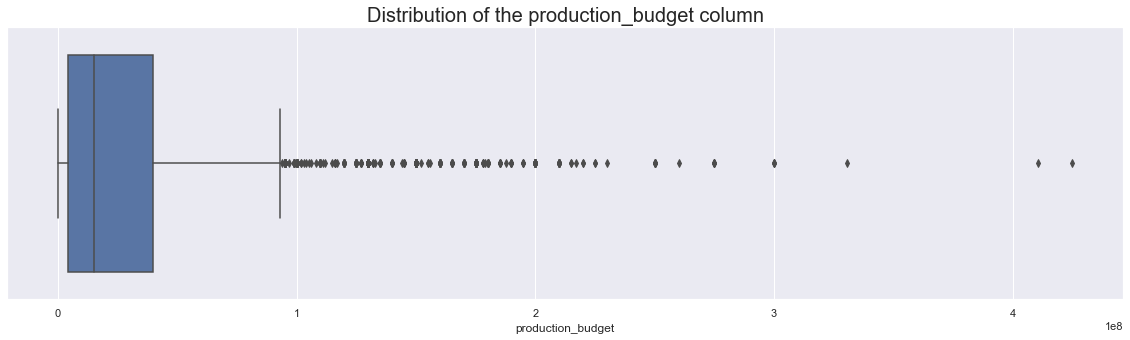

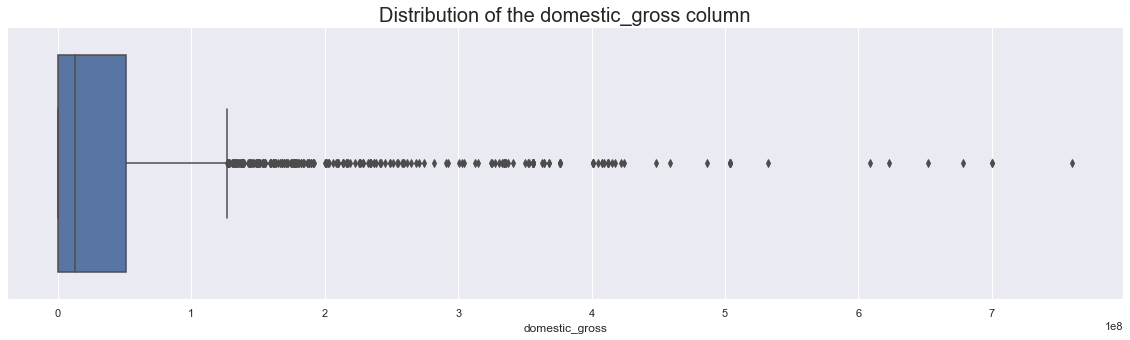

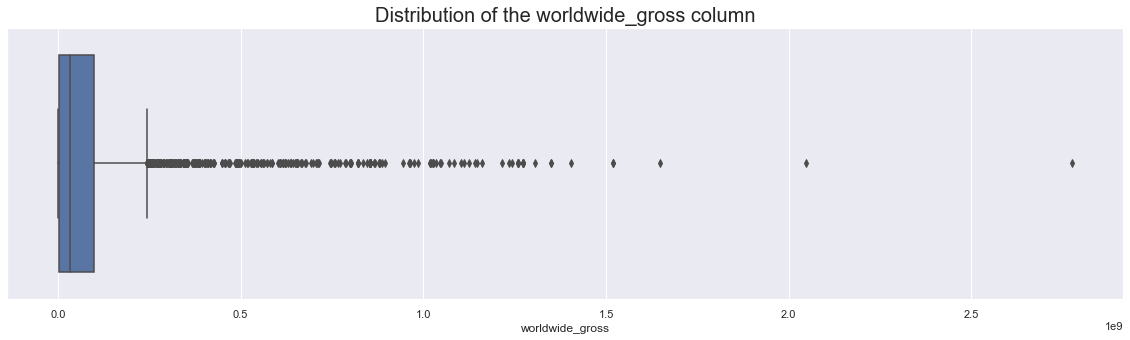

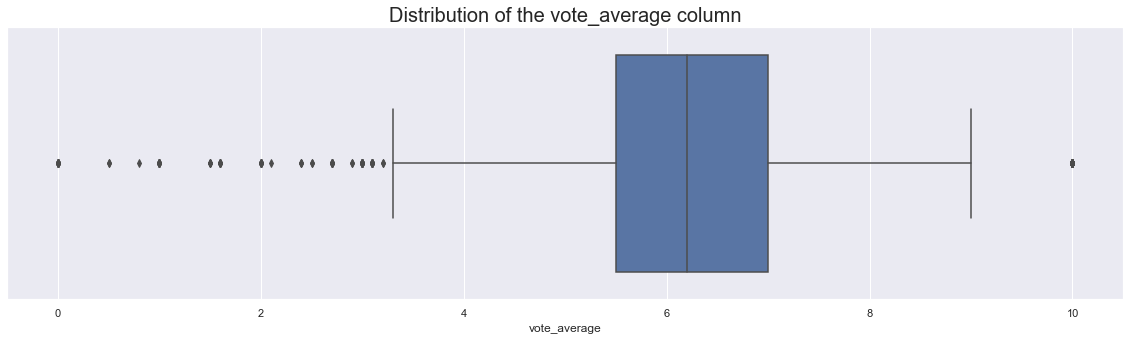

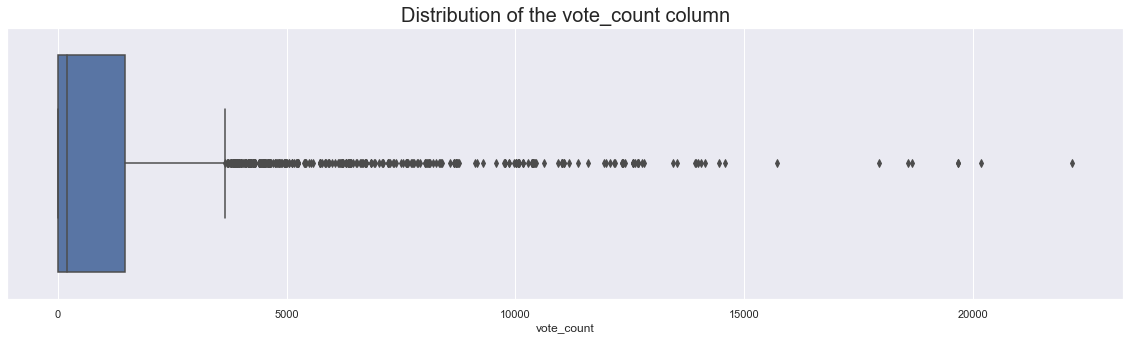

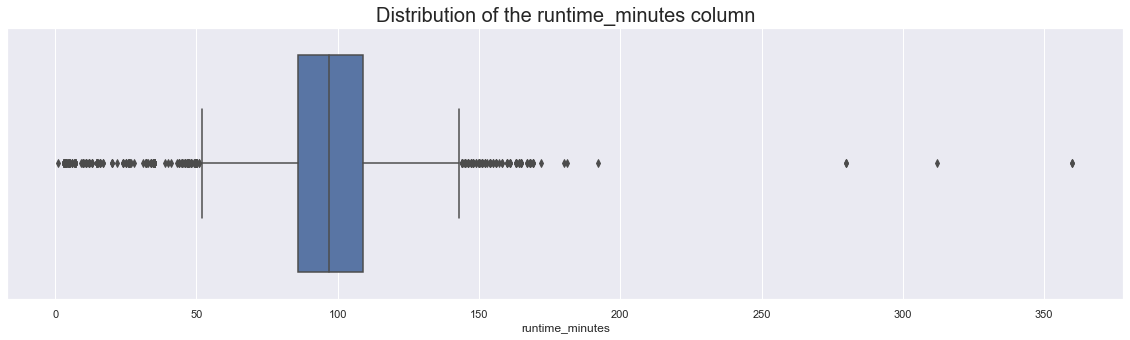

In [723]:
# Instead use subplots to plot individual boxplots
cols = ['production_budget', 'domestic_gross', 'worldwide_gross','vote_average', 'vote_count',
       'runtime_minutes']

# define subplot grid
for column in df1:
        plt.figure(figsize=(20,5))
        plt.title('Distribution of the ' + column+ ' column',fontsize=(20))
        sns.boxplot(data=df1, x=column)

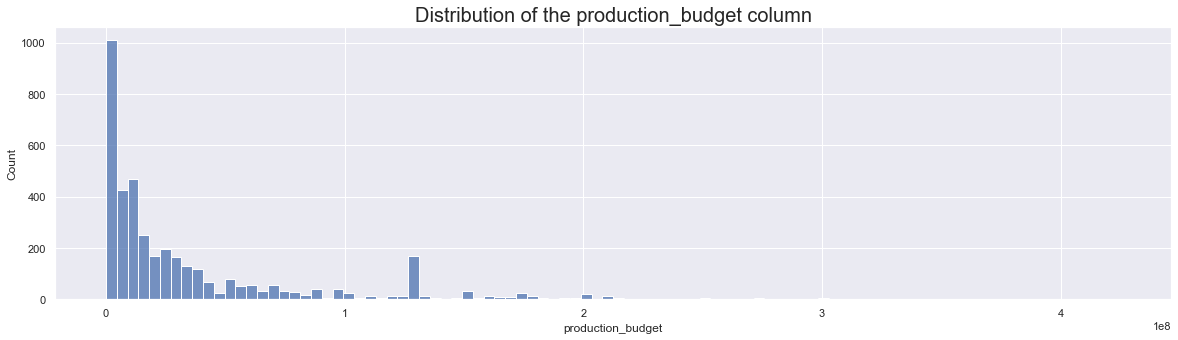

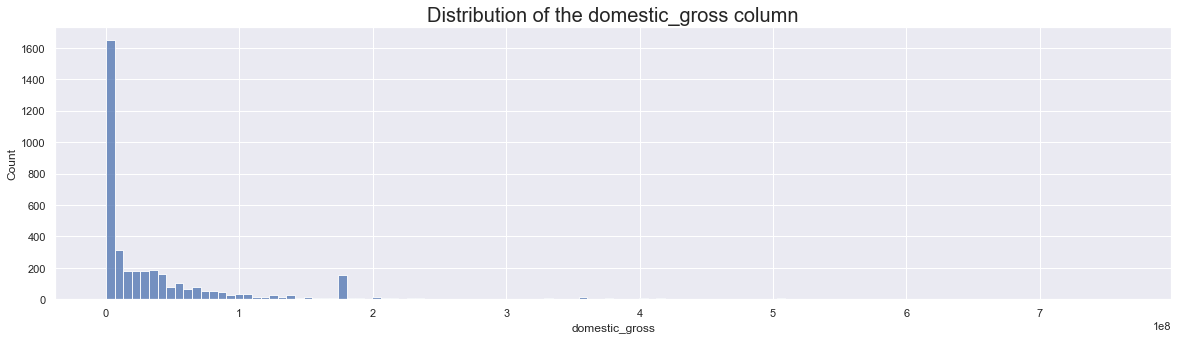

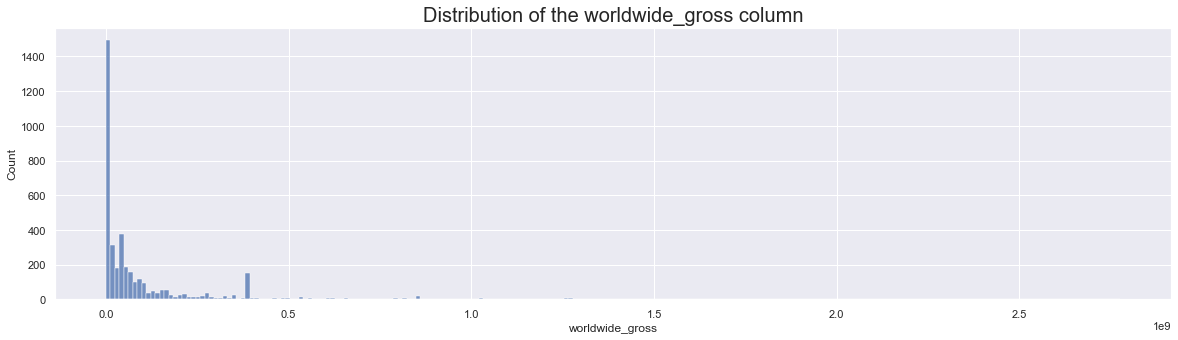

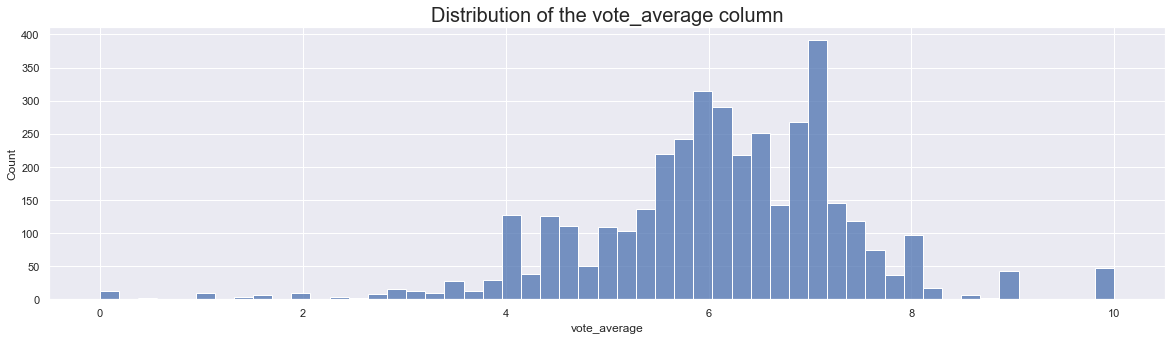

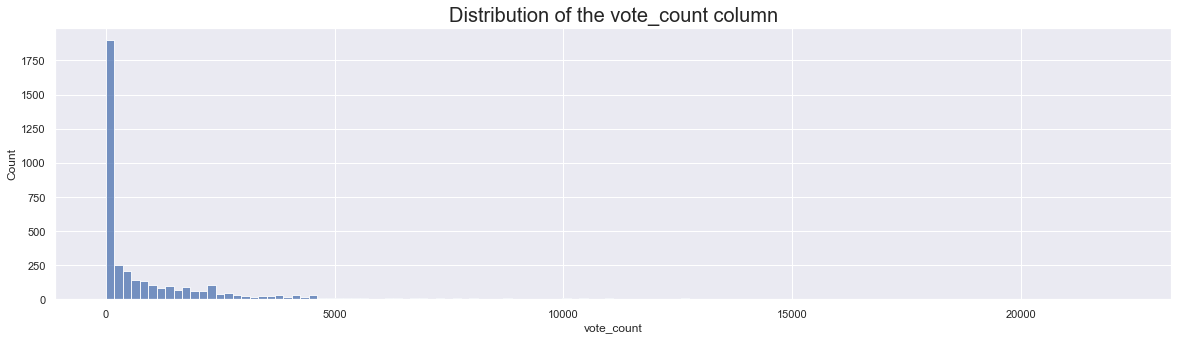

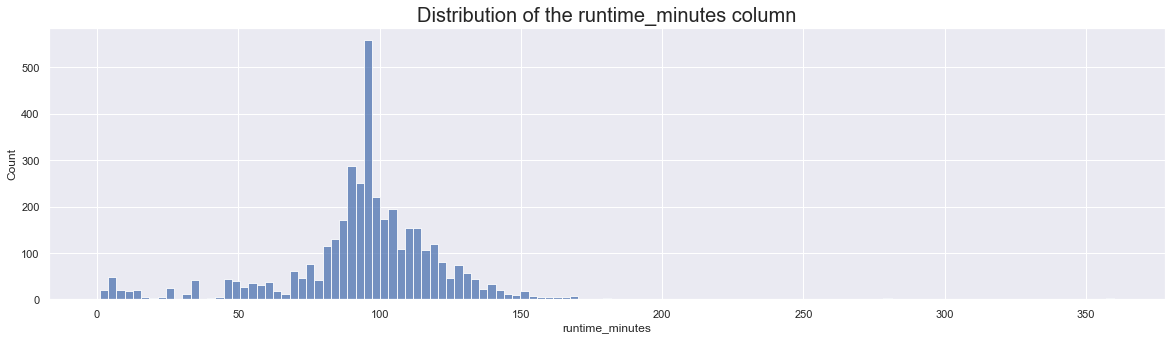

In [724]:
# Plotting histograms for our columns

for column in df1:
        plt.figure(figsize=(20,5))
        plt.title('Distribution of the ' + column+ ' column',fontsize=(20))
        sns.histplot(data=df1, x=column)

# This plot cannot be interpreted as the values on the x-axis are overlapping. 

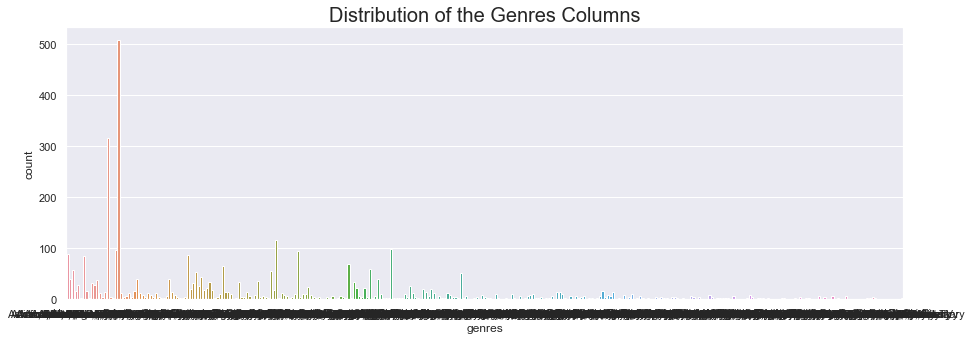

In [725]:
# Plotting the Distibution of the Genres
plt.figure(figsize=(15,5))
plt.title('Distribution of the Genres Columns',fontsize=(20))
sns.countplot(data=df,x='genres');

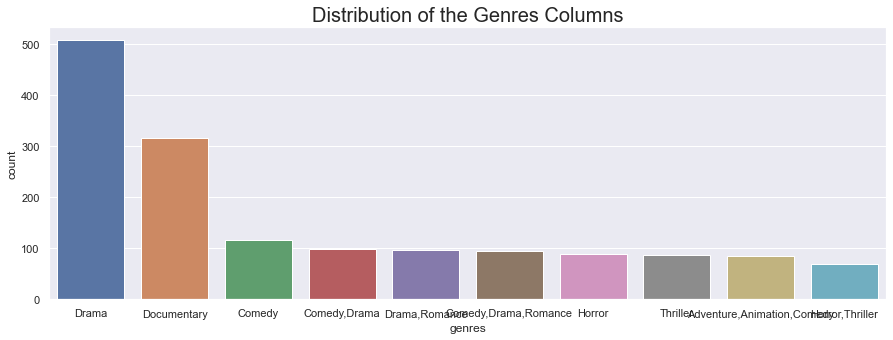

In [726]:
# Instead you can, and should, plot the top 10. 
# Even in this instance alot of the values are overlapping, what you should do is flip the plot. 
plt.figure(figsize=(15,5))
plt.title('Distribution of the Genres Columns',fontsize=(20))
sns.countplot(x='genres',data=df,order=pd.value_counts(df['genres']).iloc[:10].index);


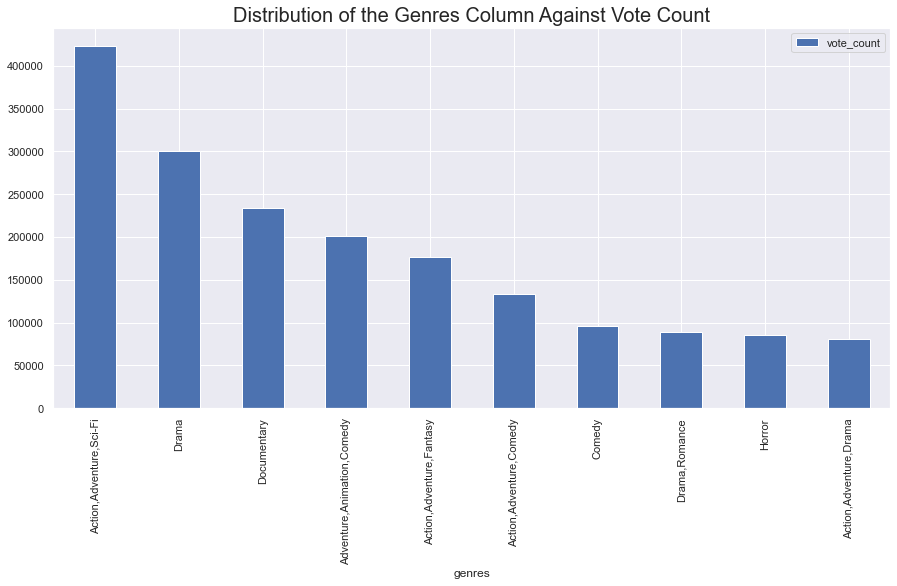

In [727]:
# Distribution of genres and Production Budget
prd = pd.DataFrame(df.groupby('genres')['vote_count'].sum().nlargest(10).sort_values(ascending = False)).plot(kind='bar',figsize=(15,7))
plt.title('Distribution of the Genres Column Against Vote Count',fontsize=(20));

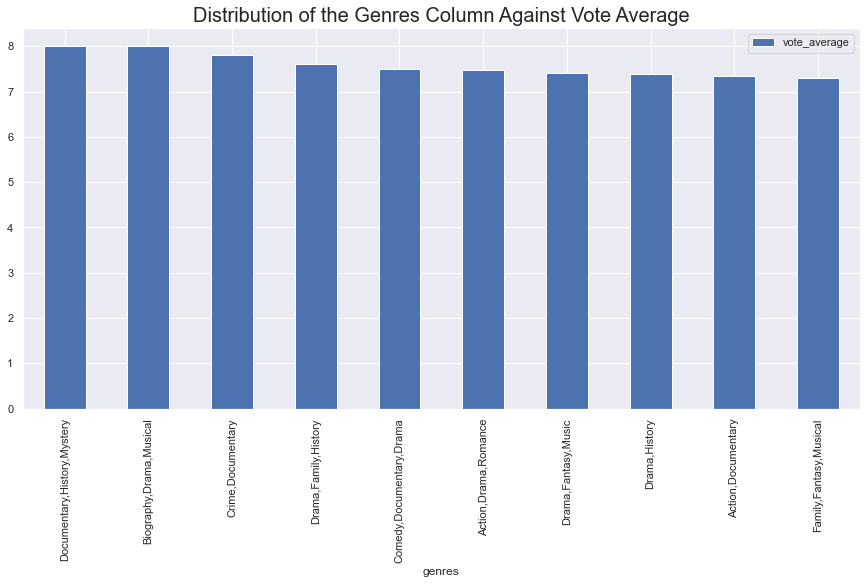

In [728]:
# Distribution of genres and Production Budget
prd = pd.DataFrame(df.groupby('genres')['vote_average'].mean().nlargest(10).sort_values(ascending = False)).plot(kind='bar',figsize=(15,7))
plt.title('Distribution of the Genres Column Against Vote Average',fontsize=(20));

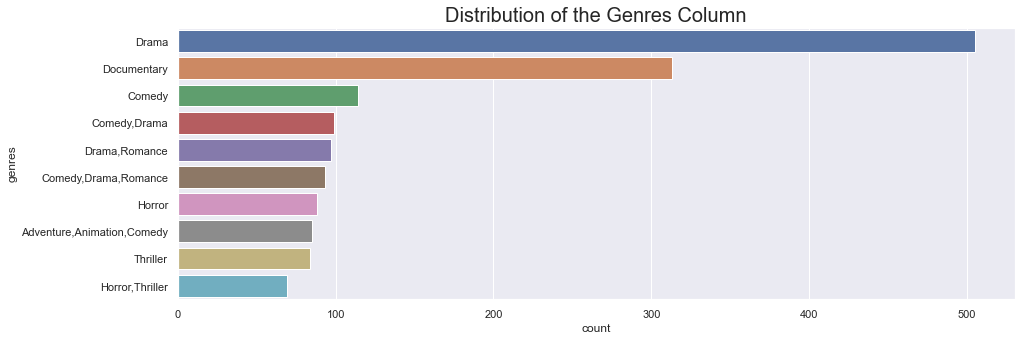

In [744]:
# Instead you can, and should, plot the top 10 
plt.figure(figsize=(15,5))
plt.title('Distribution of the Genres Column',fontsize=(20))
sns.countplot(y='genres',data=df,order=pd.value_counts(df['genres']).iloc[:10].index);

### Bivariate Data Analysis

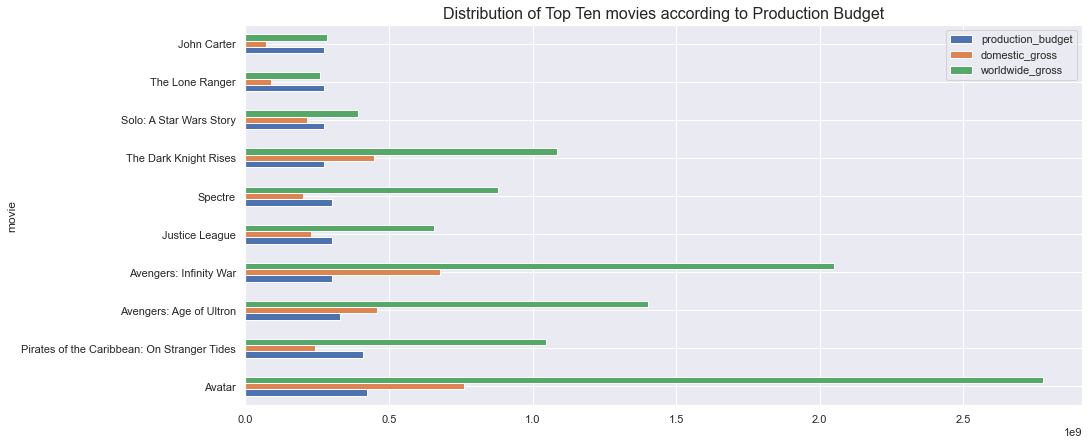

In [730]:
# Plotting the top 10 movies in terms of Production Budget
data=df.nlargest(10, 'production_budget')
data.plot(x="movie", y=['production_budget', 'domestic_gross', 'worldwide_gross'], kind="barh",figsize=(15,7));
plt.title('Distribution of Top Ten movies according to Production Budget',fontsize=16);

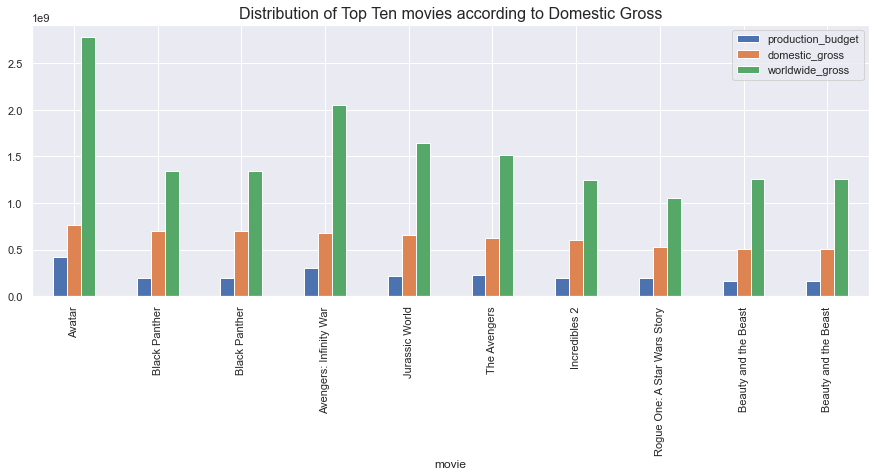

In [731]:
# Plotting the top 10 movies in terms of Domestic Gross
data=df.nlargest(10, 'domestic_gross')
data.plot(x="movie", y=['production_budget', 'domestic_gross', 'worldwide_gross'], kind="bar",figsize=(15,5));
plt.title('Distribution of Top Ten movies according to Domestic Gross',fontsize=16);

In [732]:
# Investigating why there are two instaces of Black Panther
df_4 = df
df_4.set_index("movie",inplace=True)
 
# Using the operator .loc[] to select single row
result = df_4.loc["Black Panther"]

# Show the dataframe
result


,production_budget,domestic_gross,worldwide_gross,popularity,release_date_tmdb,vote_average,vote_count,runtime_minutes,genres
movie,,,,,,,,,
Black Panther,200000000,700059566,1348258224,2.05800,2011-01-18,5.10000,11,134.00000,"Action,Adventure,Sci-Fi"
Black Panther,200000000,700059566,1348258224,44.14000,2018-02-16,7.40000,12365,134.00000,"Action,Adventure,Sci-Fi"


In [733]:
df.reset_index(inplace=True)

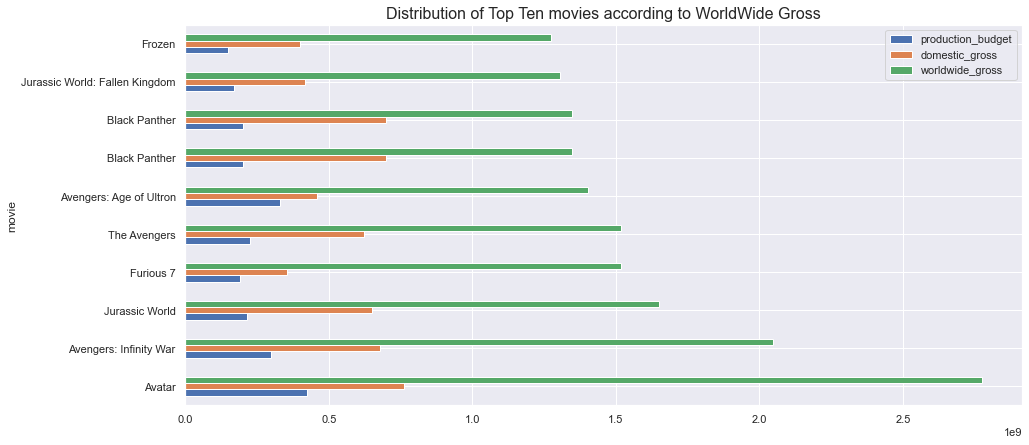

In [734]:
# Plotting the top 10 movies in terms of Worldwide Gross

data=df.nlargest(10, 'worldwide_gross')
data.plot(x="movie", y=['production_budget', 'domestic_gross', 'worldwide_gross'], kind="barh",figsize=(15,7));
plt.title('Distribution of Top Ten movies according to WorldWide Gross',fontsize=16);

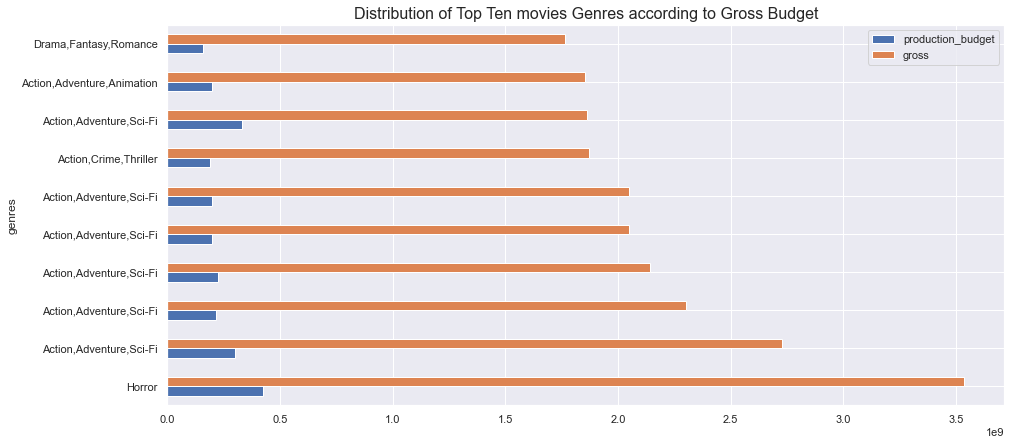

In [735]:
df['gross'] = df.domestic_gross + df.worldwide_gross
df2 = df.nlargest(10, 'gross')

df2.production_budget.mean()

df2.plot(x="genres", y=['production_budget', 'gross'], kind="barh",figsize=(15,7));
plt.title('Distribution of Top Ten movies Genres according to Gross Budget',fontsize=16);


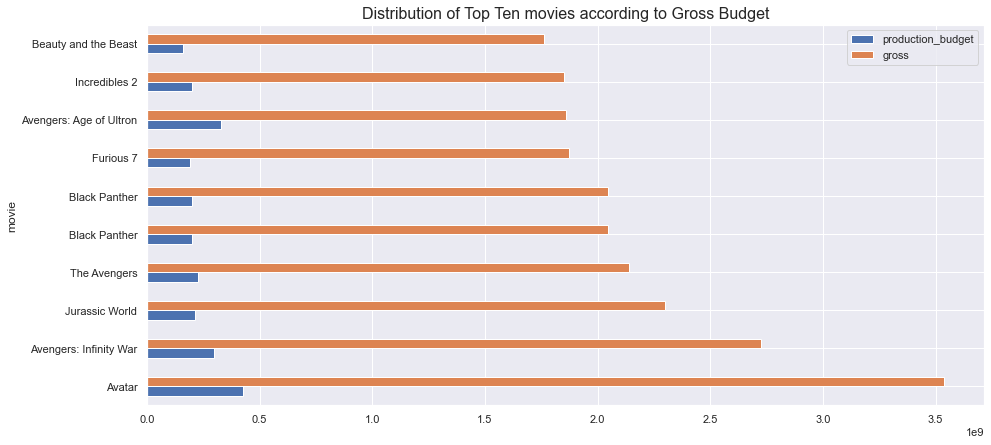

In [736]:
df['gross'] = df.domestic_gross + df.worldwide_gross
df2 = df.nlargest(10, 'gross')

df2.production_budget.mean()

df2.plot(x="movie", y=['production_budget', 'gross'], kind="barh",figsize=(15,7));
plt.title('Distribution of Top Ten movies according to Gross Budget',fontsize=16);


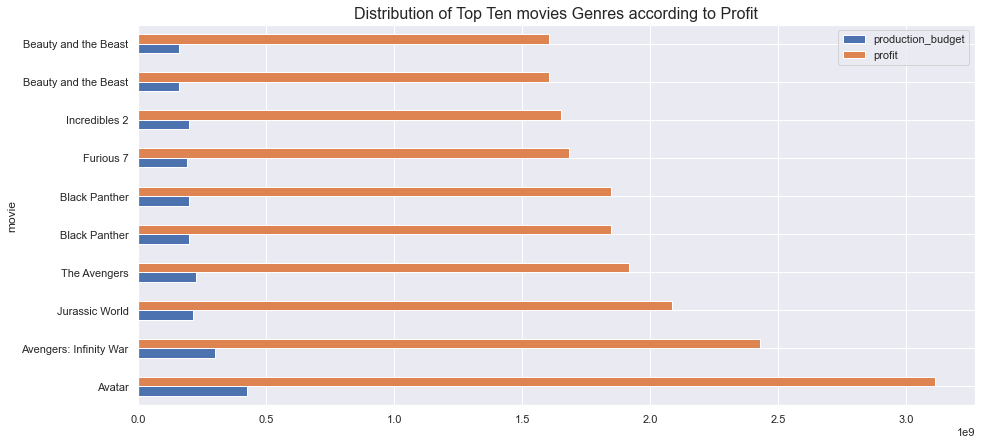

In [737]:
# Plotting the profit made by the top 10 movies
df['profit'] = (df.domestic_gross + df.worldwide_gross) - df.production_budget
df2 = df.nlargest(10, 'profit')

df2.production_budget.mean()

df2.plot(x="movie", y=['production_budget', 'profit'], kind="barh",figsize=(15,7));
plt.title('Distribution of Top Ten movies Genres according to Profit',fontsize=16);


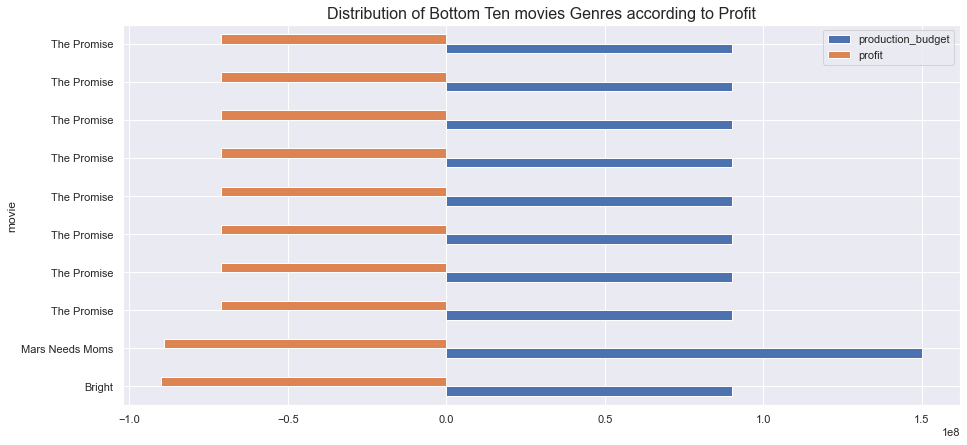

In [738]:
# Plotting the profit made by the bottom 10 movies
df['profit'] = (df.domestic_gross + df.worldwide_gross) - df.production_budget
df2 = df.nsmallest(10, 'profit')

df2.production_budget.mean()

df2.plot(x="movie", y=['production_budget', 'profit'], kind="barh",figsize=(15,7));
plt.title('Distribution of Bottom Ten movies Genres according to Profit',fontsize=16);


In [739]:
# Investigating why there are two instaces of Black Panther

df.set_index("movie",inplace=True)
 
# Using the operator .loc[] to select single row
result = df.loc["The Promise"]

# Show the dataframe
result


,production_budget,domestic_gross,worldwide_gross,popularity,release_date_tmdb,vote_average,vote_count,runtime_minutes,genres,gross,profit
movie,,,,,,,,,,,
The Promise,90000000,8224288,10551417,0.60000,2013-10-16,9.00000,1,97.00000,Drama,18775705,-71224295
The Promise,90000000,8224288,10551417,0.60000,2013-10-16,9.00000,1,97.00000,Comedy,18775705,-71224295
The Promise,90000000,8224288,10551417,0.60000,2013-10-16,9.00000,1,75.00000,NaN,18775705,-71224295
The Promise,90000000,8224288,10551417,0.60000,2013-10-16,9.00000,1,133.00000,"Drama,History",18775705,-71224295
The Promise,90000000,8224288,10551417,0.60000,2013-10-16,9.00000,1,74.00000,Documentary,18775705,-71224295
The Promise,90000000,8224288,10551417,0.60000,2013-10-16,9.00000,1,90.00000,Thriller,18775705,-71224295
The Promise,90000000,8224288,10551417,0.60000,2013-10-16,9.00000,1,97.00000,Action,18775705,-71224295
The Promise,90000000,8224288,10551417,0.60000,2013-10-16,9.00000,1,62.00000,"Comedy,Drama,Romance",18775705,-71224295
The Promise,90000000,8224288,10551417,0.60000,2013-10-16,9.00000,1,114.00000,"Drama,Horror,Thriller",18775705,-71224295


The promise appears several times in the dataset, this is due to the movie being assigned to several different genres. The step was taken to drop the entries.

In [740]:
# Remove rows
df.reset_index(inplace=True)
df = df[df.movie != "The Promise"]

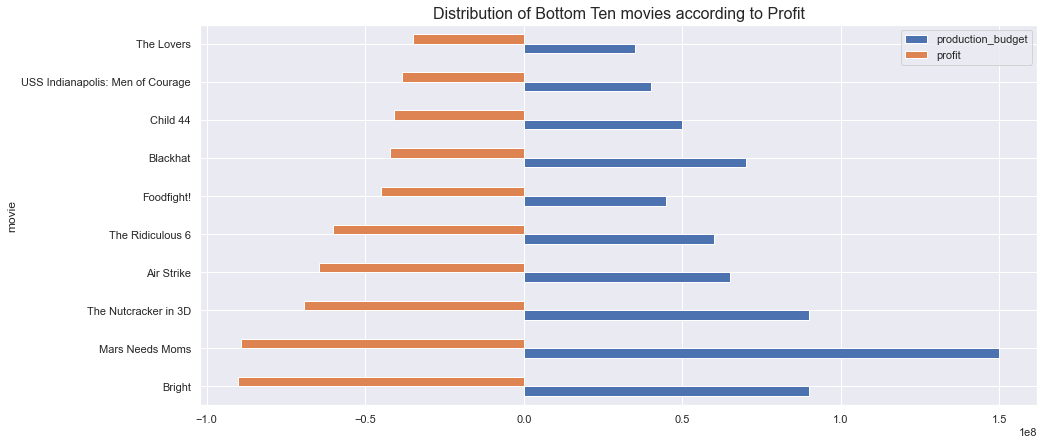

In [743]:
# Plotting the profit made by the bottom 10 movies
df['profit'] = (df.domestic_gross + df.worldwide_gross) - df.production_budget
df2 = df.nsmallest(10, 'profit')

df2.production_budget.mean()

df2.plot(x="movie", y=['production_budget', 'profit'], kind="barh",figsize=(15,7));
plt.title('Distribution of Bottom Ten movies according to Profit',fontsize=16);


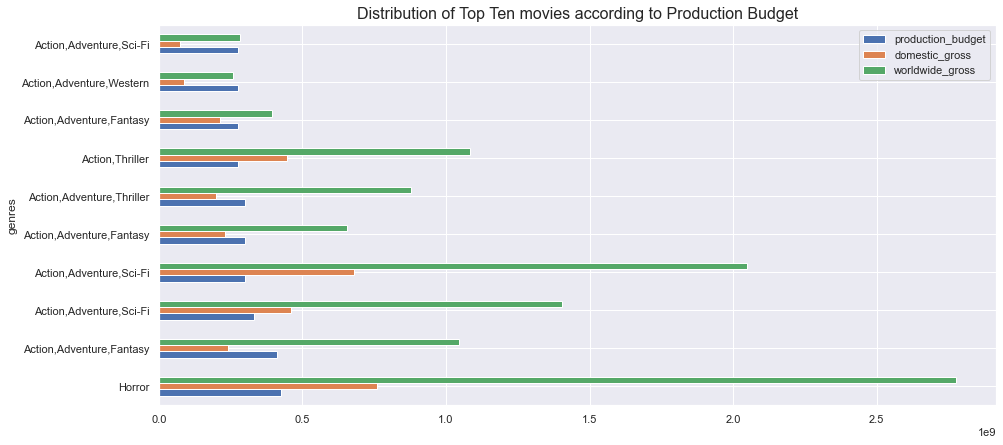

In [433]:
# Plotting the top 10 movies in terms of Production Budget
data=df.nlargest(10, 'production_budget')
data.plot(x="genres", y=['production_budget', 'domestic_gross', 'worldwide_gross'], kind="barh",figsize=(15,7));
plt.title('Distribution of Top Ten movies according to Production Budget',fontsize=16);



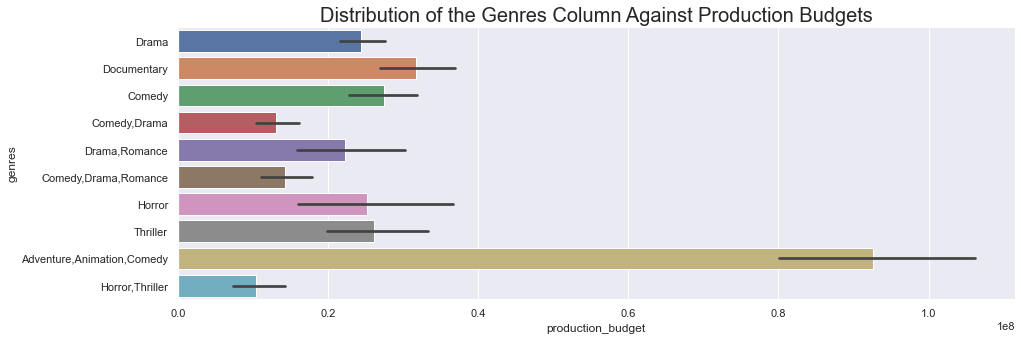

In [413]:
# Distribution of genres and Production Budgets
data=df.nlargest(10, 'gross')
plt.figure(figsize=(15,5))
plt.title('Distribution of the Genres Column Against Production Budgets',fontsize=(20))
sns.barplot(y='genres',x='production_budget',data=d,order=pd.value_counts(df['genres']).iloc[:10].index);

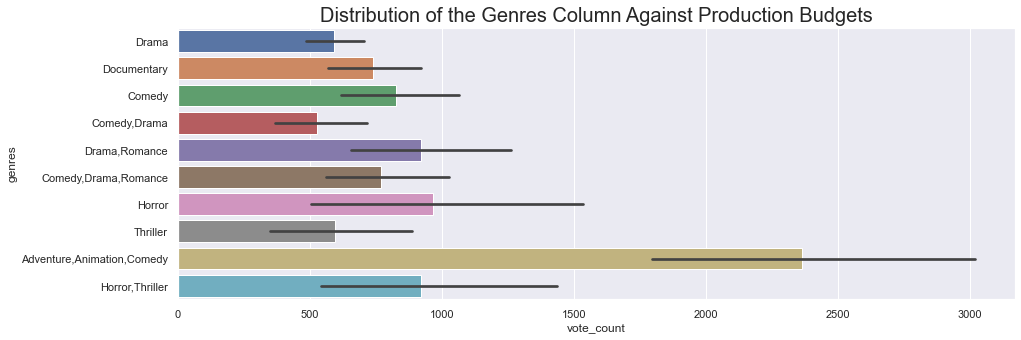

In [414]:
# Distribution of genres and the Vote Count
plt.figure(figsize=(15,5))
plt.title('Distribution of the Genres Column Against Production Budgets',fontsize=(20))
sns.barplot(y='genres',x='vote_count',data=df,order=pd.value_counts(df['genres']).iloc[:10].index);

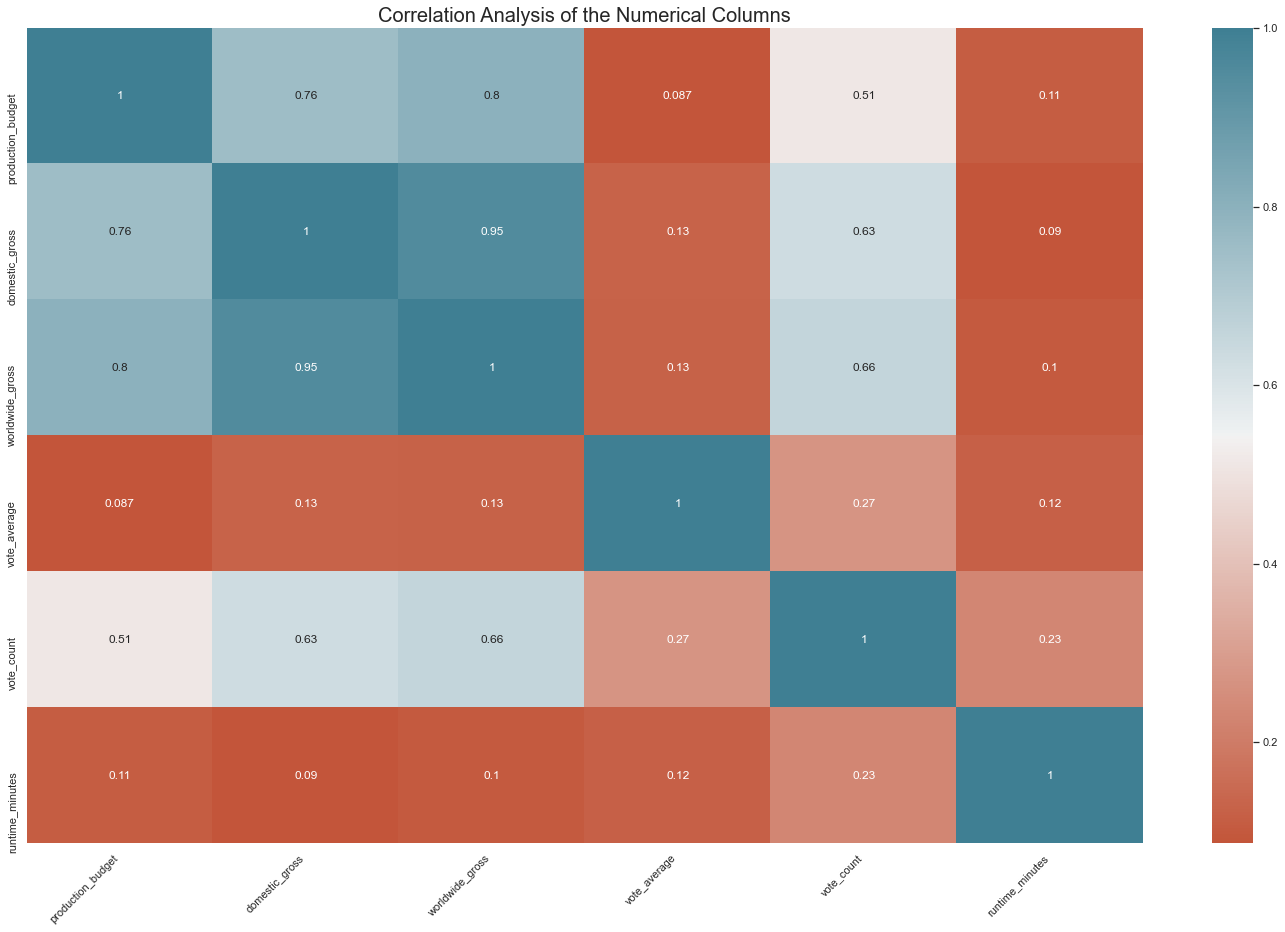

In [310]:
## Correlation Analysis 

plt.figure(figsize = (25,15))
plt.title('Correlation Analysis of the Numerical Columns',fontsize=20)
ax = sns.heatmap(df1.corr(),cmap=sns.diverging_palette(20, 220, n=256), annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.show()


### Conclusions
- From my analysis, I noted that overall there is a strong positive correlation between the Production Budget and the Domestic and Worldwide Gross.

- Overall movies in the Adventure Genre Outperformed movies in other Genres.

- The Horror Genre made the highest amount in terms of both Domestic and Worldwide Gross. However it should be noted that the reason for this is due to the Avatar Movie, an outlier, which had significant success at the Box Office due to several reasons. 
   - Firstly, it was directed by James Cameron, who had previously directed successful movies such as "Titanic" and     "Terminator 2". Secondly, the movie was released at a time when special effects and computer-generated imagery      had advanced to the point where filmmakers could create very believable, lifelike worlds, and "Avatar" was one      of the first movies to showcase this level of visual spectacle on a large scale.

### Recommendations 

- Microsoft's movie studio should be willing to invest significant capital into their movies, the ten top grossing movies had an average Production Budget of 244560000.0.

- Movies in the Action,Adventure,Sci-Fi Genre seem to perform overall very well. Microsoft should invested in these Genres. 